### Simulation

In [1]:
from bmc.simulate import simulate
import numpy as np
import torch
import matplotlib.pyplot as plt

[W207 01:45:45.108147502 Context.cpp:281] Warning: torch.backends.cuda.preferred_linalg_library is an experimental feature. If you see any error or unexpected behavior when this flag is set please file an issue on GitHub. (function operator())


In [3]:
low = -20e-6
high = 20e-6

n_iso = 10000

z_pos = np.linspace(low, high, n_iso)
z_pos = torch.tensor(z_pos)
z_pos = torch.cat((z_pos, torch.tensor([0.0])))  # Füge 0 hinzu
z_pos = torch.sort(z_pos).values

In [4]:
seq_path_gauss = 'seq_lib/10_ETM.seq'
config_path = 'sim_lib/config_1pool.yaml'

adc_time = 20e-3
retun_zmag = False
show_plot = False
n_backlog = 3
webhook = False
plt_range = [0, 4]
iso_select = [-5,0,5]

In [5]:
sim = simulate(config_file=config_path, 
                   seq_file=seq_path_gauss, 
                   adc_time=adc_time,
                   z_positions=z_pos,
                   return_zmag=retun_zmag,
                   iso_select=iso_select,
                   show_plot=show_plot,
                   n_backlog=n_backlog,
                   webhook=webhook,
                   plt_range=plt_range)  # simulation mac

BMCTool simulation:   0%|          | 0/7 [00:00<?, ?it/s]

BMCTool simulation:   0%|          | 0/7 [00:00<?, ?it/s]


RuntimeError: CUDA error: operation failed due to a previous error during capture
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


/home/danielmiksch/optim/bmc/utils/eval.py:303: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


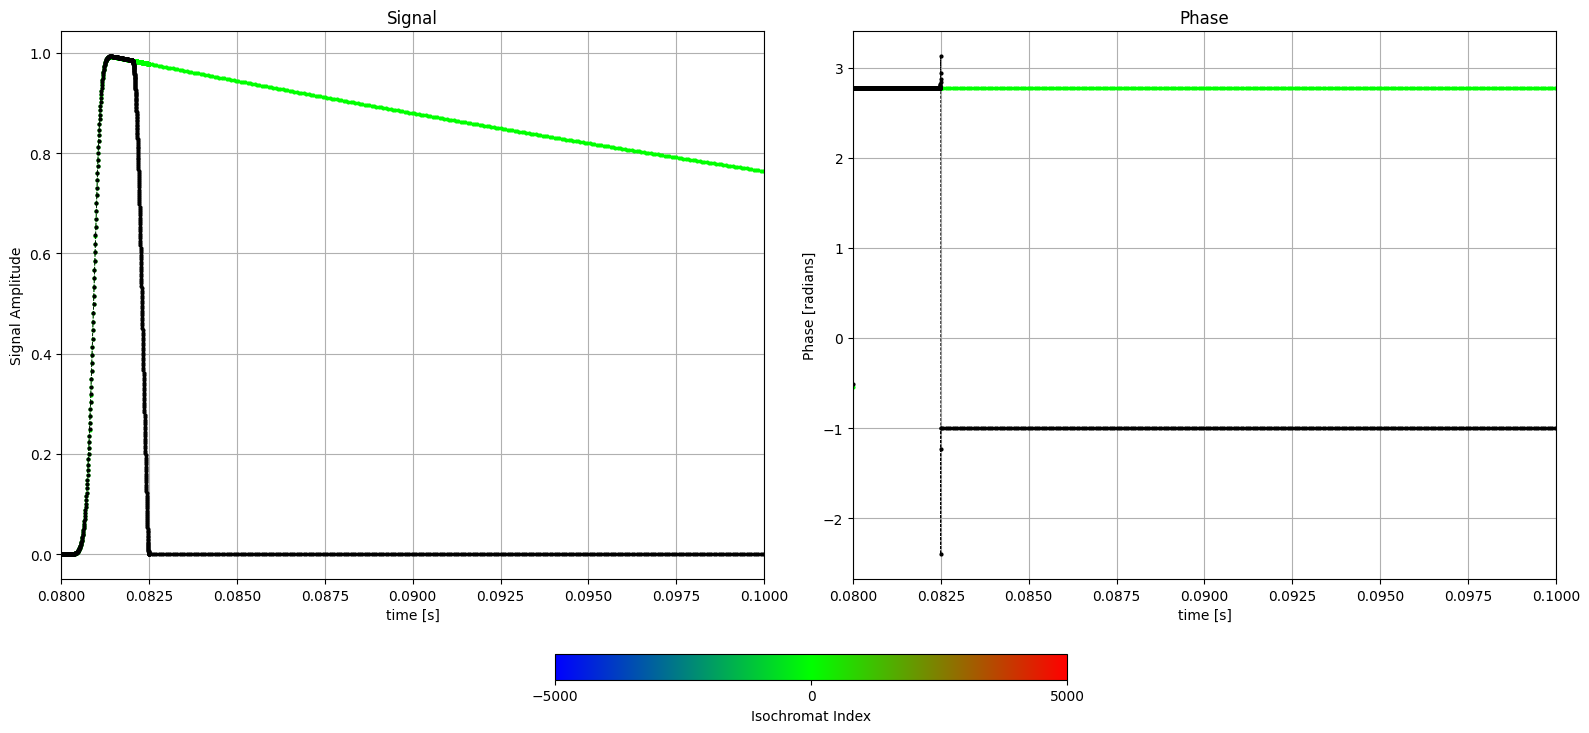

In [5]:
from bmc.utils.eval import plot_sim
time, m_z, m_z_total, m_c, m_c_total = sim.get_mag(return_cest_pool=False)
time = time.cpu().numpy()
m_z = m_z.cpu().numpy()
m_z_total = m_z_total.cpu().numpy()
m_c = m_c.cpu().numpy()
m_c_total = m_c_total.cpu().numpy()

iso_select = [0]
plt_range = [0.0, 0.0353] #1ETM
# plt_range = [0.0675, 0.074] #5ETM
# plt_range = [0.1250, 0.141] #10ETM
# plt_range = [0.0675, 0.09]
plt_range = [0.08, 0.1]

# _ = plot_sim(m_out=[m_z, m_z_total], time=time., plt_range=plt_range, iso_select=iso_select)
_ = plot_sim(m_out=[m_c, m_c_total], time=time, plt_range=plt_range, iso_select=iso_select)

m_trans_plus = np.abs(m_c_total)[-900:]
m_z_plus = m_z_total


### Animation

In [12]:
run_time = .1
track_path = True
ie = False
timing = False
total_mag = False
animate_cest = False
kwargs = {'quality': '-ql', 'write': '--write_to_movie'}  #--write_to_movie

In [13]:
# sim.animate(run_time=run_time, 
#             track_path=track_path, 
#             ie=ie, 
#             timing=timing,
#             total_mag=total_mag,
#             animate_cest=animate_cest,
#             **kwargs)

In [14]:
seq_path_gauss = 'seq_lib/10_ETM_minus.seq'

In [15]:
sim_minus = simulate(config_file=config_path, 
                   seq_file=seq_path_gauss, 
                   adc_time=adc_time,
                   z_positions=z_pos,
                   return_zmag=retun_zmag,
                   iso_select=iso_select,
                   show_plot=show_plot,
                   n_backlog=n_backlog,
                   webhook=webhook,
                   plt_range=plt_range)  # simulation mac

BMCTool simulation:   0%|          | 0/7 [00:00<?, ?it/s]

BMCTool simulation: 100%|██████████| 7/7 [01:50<00:00, 15.84s/it]

['rf at 0.0000s', 'rf at 0.0800s', 'gz at 0.0820s', 'adc at 0.0825s']


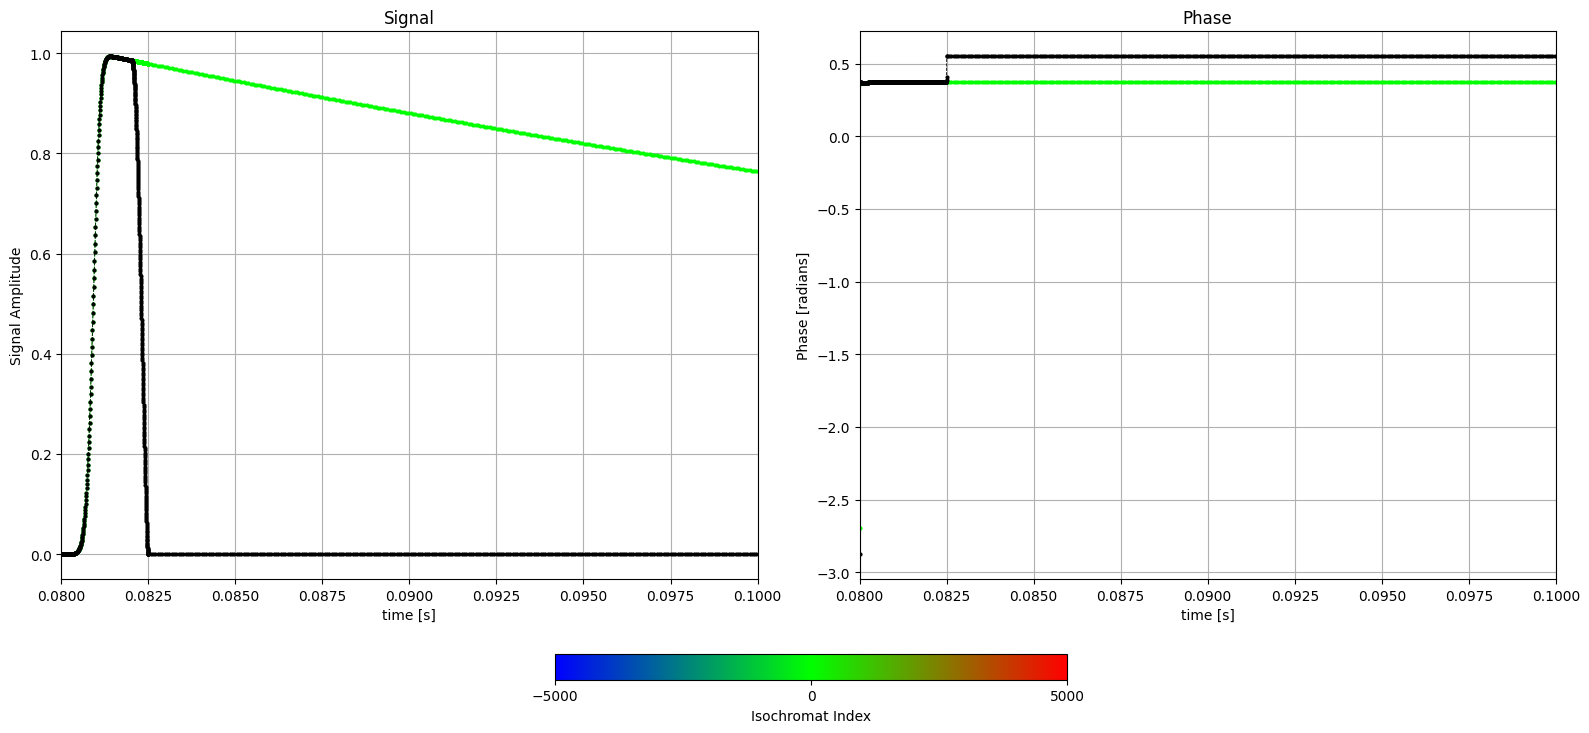

In [16]:
from bmc.utils.eval import plot_sim
time, m_z, m_z_total, m_c, m_c_total = sim_minus.get_mag(return_cest_pool=False)
time = time.cpu().numpy()
m_z = m_z.cpu().numpy()
m_z_total = m_z_total.cpu().numpy()
m_c = m_c.cpu().numpy()
m_c_total = m_c_total.cpu().numpy()

iso_select = [0]
plt_range = [0.0, 0.0353] #1ETM
# plt_range = [0.0675, 0.074] #5ETM
# plt_range = [0.0286, 0.0360]
# plt_range = [0.0675, 0.09]
# plt_range = [0.8275, 1.048] #wex
# plt_range = [0.08, 0.11]
plt_range = [0.08, 0.1]

# _ = plot_sim(m_out=[m_z, m_z_total], time=time, plt_range=plt_range, iso_select=iso_select)
_ = plot_sim(m_out=[m_c, m_c_total], time=time, plt_range=plt_range, iso_select=iso_select)

m_trans_minus = np.abs(m_c_total)[-900:]

In [17]:
x_rf = np.arange(0, 2e-3, 2e-3/300)
x_spoil = np.arange(2e-3,2.5e-3, 0.5e-3/300) #0.5ms spoil
# x_spoil = np.arange(2e-3,3e-3, 1e-3/300) #1ms spoil
# x_adc = np.arange(2.5e-3, 5.5e-3, 3e-3/300) #3ms adc
x_adc = np.arange(2.5e-3, 14.5e-3, 12e-3/300) #200ms adc
# x_adc = np.arange(3e-3, 6e-3, 3e-3/300) #3ms adc


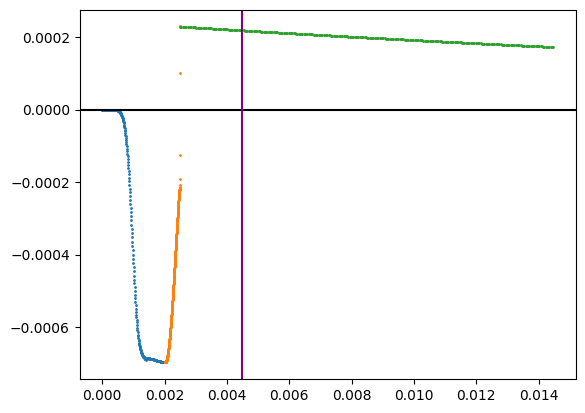

In [18]:
# plt.plot(x_spoil, (np.abs(m_trans_plus)-np.abs(m_trans_minus))[:300])
# plt.plot(x_adc, (np.abs(m_trans_plus)-np.abs(m_trans_minus))[300:])
plt.plot(x_rf,(m_trans_plus-m_trans_minus)[:300], 'o', markersize=1)
plt.plot(x_spoil,(m_trans_plus-m_trans_minus)[300:600], 'o', markersize=1)
plt.plot(x_adc,(m_trans_plus-m_trans_minus)[600:], 'o', markersize=1)
plt.axhline(0, c='black')
# plt.axhline(0.0055)
# plt.axvline(0.002476)

# plt.scatter(0.002476, 0.0055, c='b')

# plt.axhline(0.0295, color='r')
# plt.axvline(0.0025, color='r')

# plt.scatter(0.0025, 0.0295, c='r')

# plt.axhline(0.0006, color='g')
# plt.axvline(0.002482, color='g')

# plt.scatter(0.002475, 0.00026, c='g')

plt.axvline(0.0045, color='purple')
# plt.axvline(0.002485, color='purple')
# plt.scatter(0.002497, 0.000136, c='purple')

# plt.plot(x_rf,m_trans_plus[:300], 'o', markersize=1, c='b')
# plt.plot(x_spoil,m_trans_plus[300:600], 'o', markersize=1, c='b')
# plt.plot(x_adc,m_trans_plus[600:], 'o', markersize=1, c='b')

# plt.plot(x_rf,m_trans_minus[:300], 'o', markersize=1, c='r')
# plt.plot(x_spoil,m_trans_minus[300:600], 'o', markersize=1, c='r')
# plt.plot(x_adc,m_trans_minus[600:], 'o', markersize=1, c='r')

# plt.axvline(0.002449)

# plt.xlim(0.0024, 0.0026)
# plt.xlim(0.0023, 0.0025)
# plt.xlim(0.002, 0.006)
# plt.ylim(-0.02, 0.032)
# plt.ylim(-0.0002, 0.0002)
resulst = (m_trans_plus-m_trans_minus)

(0.0, 0.25)

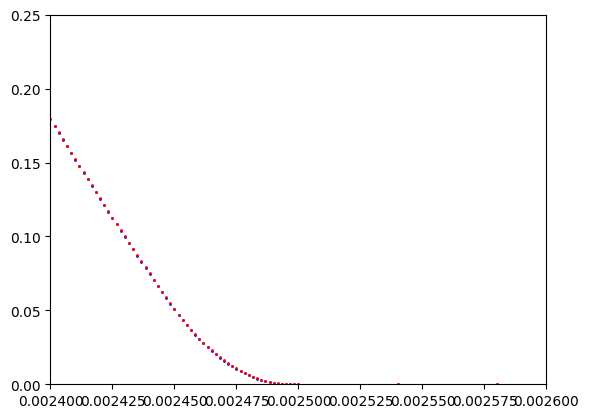

In [19]:
plt.plot(x_rf,m_trans_plus[:300], 'o', markersize=1, c='b')
plt.plot(x_spoil,m_trans_plus[300:600], 'o', markersize=1, c='b')
plt.plot(x_adc,m_trans_plus[600:], 'o', markersize=1, c='b')

plt.plot(x_rf,m_trans_minus[:300], 'o', markersize=1, c='r')
plt.plot(x_spoil,m_trans_minus[300:600], 'o', markersize=1, c='r')
plt.plot(x_adc,m_trans_minus[600:], 'o', markersize=1, c='r')
# plt.axhline(0, c='black')

plt.xlim(0.0024, 0.0026)
# plt.xlim(0.004, 0.0045)
plt.ylim(0, 0.25)

n_iso: 1001


BMCTool simulation: 100%|██████████| 7/7 [00:29<00:00,  4.17s/it]


['rf at 0.0000s', 'gz at 0.0020s', 'adc at 0.0025s']
['rf at 0.0000s', 'gz at 0.0020s', 'adc at 0.0025s']


[W207 01:10:53.734497645 CudaIPCTypes.cpp:16] Producer process has been terminated before all shared CUDA tensors released. See Note [Sharing CUDA tensors]
[W207 01:10:53.734611668 CudaIPCTypes.cpp:16] Producer process has been terminated before all shared CUDA tensors released. See Note [Sharing CUDA tensors]


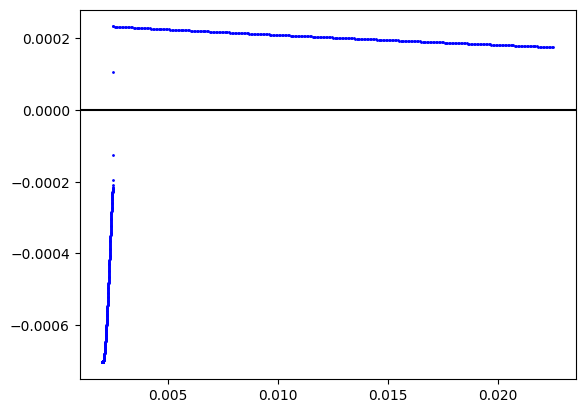

0.0002331363993933616


In [1]:
from bmc.utils.tex_variation import run_variation_parallel
import numpy as np
import torch

seq_on = 'seq_lib/10_ETM.seq'
seq_off = 'seq_lib/10_ETM_minus.seq'
config_path = 'sim_lib/config_1pool.yaml'

adc_time = 20e-3
webhook = False

low = -20e-6
high = 20e-6 
n_iso = 1000
z_pos = np.linspace(low, high, n_iso)
z_pos = torch.tensor(z_pos)
z_pos = torch.cat((z_pos, torch.tensor([0.0])))  # Füge 0 hinzu
z_pos = torch.sort(z_pos).values

print(f'n_iso: {len(z_pos)}')
_, singal = run_variation_parallel(seq_on, seq_off, config_path, adc_time, z_pos, webhook, show_plot=True)
print(singal)

In [ ]:
0.0002294835742316297